<h1>UK ACCIDENTS DATA ANALYSIS</h1>
<h2>Inclusive Year: 2019-2022</h2>

<h3>Analyst: John Benedict A. Quijano</h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install scipy


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<h2>Loading CSV file into a Pandas DataFrame</h2>

In [3]:
accident = pd.read_csv('datasets\\data.csv')

In [4]:
accident

,Index,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h2>Filling the Missing Values</h2>

In [5]:
#For Categorical Datas [.mode()]
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])

#For large number of missing values
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown road condition')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')

accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [6]:
#Missing value counts
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident_Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>Changing Data Type into Daytime Format</h2>

In [7]:
accident['Accident_Date'] = accident['Accident_Date'].astype('str')
accident['Accident_Date'] = accident['Accident_Date'].str.strip()
accident['Accident_Date'] = accident['Accident_Date'].str.replace('/', '-')

In [8]:
accident['Accident_Date'] = pd.to_datetime(accident['Accident_Date'], dayfirst = True, errors = 'coerce') #coerce is used to validate any missing values

In [9]:
accident['Year'] = accident['Accident_Date'].dt.year
accident['Month'] = accident['Accident_Date'].dt.month
accident['Day'] = accident['Accident_Date'].dt.day
accident['DayofWeek'] = accident['Accident_Date'].dt.dayofweek

In [10]:
accident['Accident_Date'].value_counts()

Accident_Date
2019-11-30    704
2019-01-31    697
2019-07-13    692
2021-11-13    692
2019-08-14    688
             ... 
2022-12-30    171
2019-12-25    157
2022-12-25    145
2022-01-10    123
2020-12-25    118
Name: count, Length: 1461, dtype: int64

<h2>Categorical Fields</h2>

In [11]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident_Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
Year                                int32
Month                               int32
Day                                 int32
DayofWeek                           int32
dtype: object

In [12]:
accident['Index'] = accident['Index'].astype('category')
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [13]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident_Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  category      
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

In [14]:
accident.describe(include='all')

,Index,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayofWeek
count,660679,660679,660679,660679.000000,660679,660679,660679.000000,660679.000000,660679.000000,660679,660679,660679,660679,660679,660679.000000,660679.000000,660679.000000,660679.000000
unique,421020,3,NaN,511618.000000,5,422,529766.000000,NaN,NaN,6,6,3,9,16,NaN,NaN,NaN,NaN
top,2.01E+12,Slight,NaN,52.458798,Daylight,Birmingham,-0.977611,NaN,NaN,Dry,Single carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN
freq,239478,563801,NaN,75.000000,484880,13491,71.000000,NaN,NaN,447821,492143,421678,520885,497992,NaN,NaN,NaN,NaN
mean,NaN,NaN,2020-11-30 08:30:32.761749760,NaN,NaN,NaN,NaN,1.357040,1.831255,NaN,NaN,NaN,NaN,NaN,2020.409090,6.607965,15.581350,3.111195
min,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,2019.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,2019-11-27 00:00:00,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,2019.000000,4.000000,8.000000,1.000000
50%,NaN,NaN,2020-11-13 00:00:00,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,2020.000000,7.000000,16.000000,3.000000
75%,NaN,NaN,2021-11-17 00:00:00,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,2021.000000,10.000000,23.000000,5.000000
max,NaN,NaN,2022-12-31 00:00:00,NaN,NaN,NaN,NaN,68.000000,32.000000,NaN,NaN,NaN,NaN,NaN,2022.000000,12.000000,31.000000,6.000000


In [15]:
#Number of rows, columns
accident.shape 

(660679, 18)

In [16]:
accident

,Index,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayofWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


<h3>INSIGHT No. 1</h3>
<h4>Number of Slightly Severed in Urban and Rural Area</h4>

<h5>Answer: There are less slightly severed in Rural Area</h5>

In [17]:
sl_severe_urban = accident[(accident['Accident_Severity'] == 'Slight') & (accident['Urban_or_Rural_Area'] == 'Urban')]
sl_severe_rural = accident[(accident['Accident_Severity'] == 'Slight') & (accident['Urban_or_Rural_Area'] == 'Rural')]

In [18]:
sl_severe_urban.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367714 entries, 4 to 660383
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    367714 non-null  category      
 1   Accident_Severity        367714 non-null  category      
 2   Accident_Date            367714 non-null  datetime64[ns]
 3   Latitude                 367714 non-null  category      
 4   Light_Conditions         367714 non-null  category      
 5   District Area            367714 non-null  category      
 6   Longitude                367714 non-null  category      
 7   Number_of_Casualties     367714 non-null  int64         
 8   Number_of_Vehicles       367714 non-null  int64         
 9   Road_Surface_Conditions  367714 non-null  category      
 10  Road_Type                367714 non-null  category      
 11  Urban_or_Rural_Area      367714 non-null  category      
 12  Weather_Conditions   

In [19]:
sl_severe_rural.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196077 entries, 5844 to 660676
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    196077 non-null  category      
 1   Accident_Severity        196077 non-null  category      
 2   Accident_Date            196077 non-null  datetime64[ns]
 3   Latitude                 196077 non-null  category      
 4   Light_Conditions         196077 non-null  category      
 5   District Area            196077 non-null  category      
 6   Longitude                196077 non-null  category      
 7   Number_of_Casualties     196077 non-null  int64         
 8   Number_of_Vehicles       196077 non-null  int64         
 9   Road_Surface_Conditions  196077 non-null  category      
 10  Road_Type                196077 non-null  category      
 11  Urban_or_Rural_Area      196077 non-null  category      
 12  Weather_Conditions

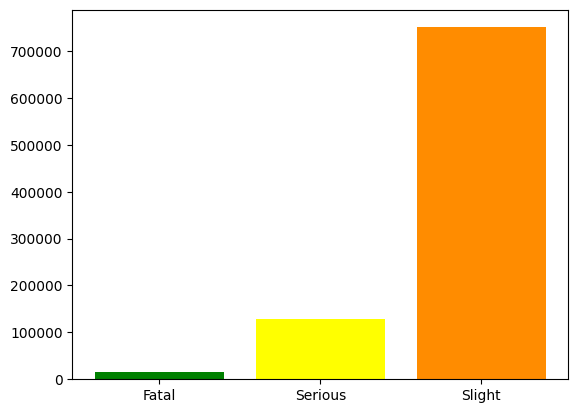

In [20]:
severity_cas = accident.groupby(['Accident_Severity'])['Number_of_Casualties'].sum().reset_index()

severity_cas.columns = ['Severity', 'Casualties']

x = severity_cas['Severity']
y = severity_cas['Casualties']

plt.bar(x, y, color=['green','yellow', 'darkorange'])
plt.show()

<h3>INSIGHT No. 2</h3>
<h4>Number of Vehicles involved with Slightly Severe Accident in Urban</h4>

<h5>Answer: 1-2 vehicle</h5>

In [21]:
sl_severe_urban_nv = sl_severe_urban['Number_of_Vehicles'].mean()

In [22]:
sl_severe_urban_nv

np.float64(1.841088454614184)

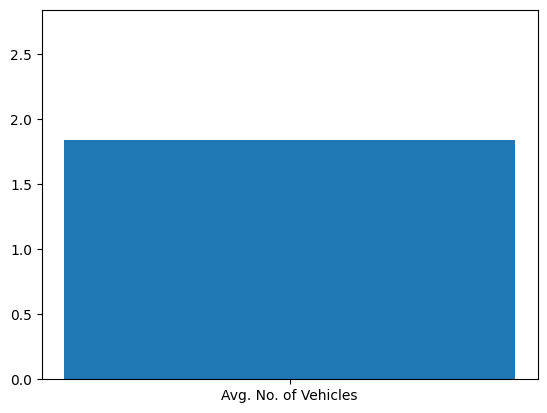

In [23]:
plt.bar(["Avg. No. of Vehicles"], [sl_severe_urban_nv])
plt.ylim(0, sl_severe_urban_nv + 1)
plt.show()

<h3>INSIGHT No. 3</h3>
<h4>Number of Serious Severed in Urban and Rural Area</h4>

<h5>Answer: There are more serious injuries in Urban Area</h5>

In [24]:
sr_severe_urban = accident[(accident['Accident_Severity'] == 'Serious') & (accident['Urban_or_Rural_Area'] == 'Urban')]
sr_severe_rural = accident[(accident['Accident_Severity'] == 'Serious') & (accident['Urban_or_Rural_Area'] == 'Rural')]

In [25]:
sr_severe_urban.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50904 entries, 0 to 660182
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    50904 non-null  category      
 1   Accident_Severity        50904 non-null  category      
 2   Accident_Date            50904 non-null  datetime64[ns]
 3   Latitude                 50904 non-null  category      
 4   Light_Conditions         50904 non-null  category      
 5   District Area            50904 non-null  category      
 6   Longitude                50904 non-null  category      
 7   Number_of_Casualties     50904 non-null  int64         
 8   Number_of_Vehicles       50904 non-null  int64         
 9   Road_Surface_Conditions  50904 non-null  category      
 10  Road_Type                50904 non-null  category      
 11  Urban_or_Rural_Area      50904 non-null  category      
 12  Weather_Conditions       50904 non-n

In [26]:
sr_severe_rural.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37312 entries, 6455 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    37312 non-null  category      
 1   Accident_Severity        37312 non-null  category      
 2   Accident_Date            37312 non-null  datetime64[ns]
 3   Latitude                 37312 non-null  category      
 4   Light_Conditions         37312 non-null  category      
 5   District Area            37312 non-null  category      
 6   Longitude                37312 non-null  category      
 7   Number_of_Casualties     37312 non-null  int64         
 8   Number_of_Vehicles       37312 non-null  int64         
 9   Road_Surface_Conditions  37312 non-null  category      
 10  Road_Type                37312 non-null  category      
 11  Urban_or_Rural_Area      37312 non-null  category      
 12  Weather_Conditions       37312 no

In [27]:
sr_severe_urban_count = sr_severe_urban.shape[0]
sr_severe_rural_count = sr_severe_rural.shape[0]

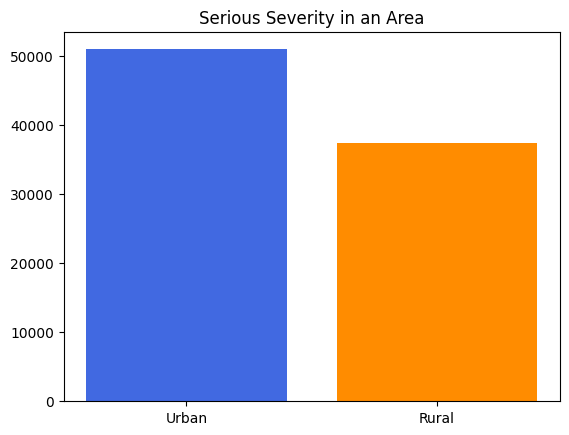

In [28]:
plt.title("Serious Severity in an Area")
plt.bar(["Urban", "Rural"], [sr_severe_urban_count, sr_severe_rural_count], color=['royalblue', 'darkorange'])
plt.show()

<h3>INSIGHT No. 4</h3>
<h4>Number of Fatal Severed in Urban and Rural Area</h4>

<h5>Answer: There are more fatalities from severed injuries in Rural Area</h5>

In [29]:
fa_severe_urban = accident[(accident['Accident_Severity'] == 'Fatal') & (accident['Urban_or_Rural_Area'] == 'Urban')]
fa_severe_rural = accident[(accident['Accident_Severity'] == 'Fatal') & (accident['Urban_or_Rural_Area'] == 'Rural')]

In [30]:
fa_severe_urban.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3060 entries, 7 to 660311
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    3060 non-null   category      
 1   Accident_Severity        3060 non-null   category      
 2   Accident_Date            3060 non-null   datetime64[ns]
 3   Latitude                 3060 non-null   category      
 4   Light_Conditions         3060 non-null   category      
 5   District Area            3060 non-null   category      
 6   Longitude                3060 non-null   category      
 7   Number_of_Casualties     3060 non-null   int64         
 8   Number_of_Vehicles       3060 non-null   int64         
 9   Road_Surface_Conditions  3060 non-null   category      
 10  Road_Type                3060 non-null   category      
 11  Urban_or_Rural_Area      3060 non-null   category      
 12  Weather_Conditions       3060 non-nul

In [31]:
fa_severe_rural.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5601 entries, 7542 to 660627
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    5601 non-null   category      
 1   Accident_Severity        5601 non-null   category      
 2   Accident_Date            5601 non-null   datetime64[ns]
 3   Latitude                 5601 non-null   category      
 4   Light_Conditions         5601 non-null   category      
 5   District Area            5601 non-null   category      
 6   Longitude                5601 non-null   category      
 7   Number_of_Casualties     5601 non-null   int64         
 8   Number_of_Vehicles       5601 non-null   int64         
 9   Road_Surface_Conditions  5601 non-null   category      
 10  Road_Type                5601 non-null   category      
 11  Urban_or_Rural_Area      5601 non-null   category      
 12  Weather_Conditions       5601 non-

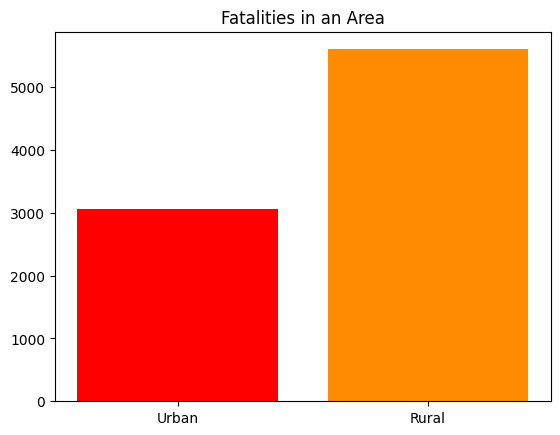

In [75]:
fa_severe_urban_count = fa_severe_urban.shape[0]
fa_severe_rural_count = fa_severe_rural.shape[0]

plt.title("Fatalities in an Area")
plt.bar(["Urban", "Rural"], [fa_severe_urban_count, fa_severe_rural_count], color=['red', 'darkorange'])
plt.show()

<h3>INSIGHT No. 5</h3>
<h4>Severity during Daylight</h4>

<h5>Answer: Accidents often result in slight injuries with 86.4% of the total number of casualties during Daylight.</h5>

In [34]:
sl_daylight = accident[(accident['Accident_Severity'] == 'Slight') & (accident['Light_Conditions'] == 'Daylight')]
sr_daylight = accident[(accident['Accident_Severity'] == 'Serious') & (accident['Light_Conditions'] == 'Daylight')]
fa_daylight = accident[(accident['Accident_Severity'] == 'Fatal') & (accident['Light_Conditions'] == 'Daylight')]

In [35]:
sl_daylight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419045 entries, 9 to 660676
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    419045 non-null  category      
 1   Accident_Severity        419045 non-null  category      
 2   Accident_Date            419045 non-null  datetime64[ns]
 3   Latitude                 419045 non-null  category      
 4   Light_Conditions         419045 non-null  category      
 5   District Area            419045 non-null  category      
 6   Longitude                419045 non-null  category      
 7   Number_of_Casualties     419045 non-null  int64         
 8   Number_of_Vehicles       419045 non-null  int64         
 9   Road_Surface_Conditions  419045 non-null  category      
 10  Road_Type                419045 non-null  category      
 11  Urban_or_Rural_Area      419045 non-null  category      
 12  Weather_Conditions   

In [36]:
sr_daylight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60759 entries, 1 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    60759 non-null  category      
 1   Accident_Severity        60759 non-null  category      
 2   Accident_Date            60759 non-null  datetime64[ns]
 3   Latitude                 60759 non-null  category      
 4   Light_Conditions         60759 non-null  category      
 5   District Area            60759 non-null  category      
 6   Longitude                60759 non-null  category      
 7   Number_of_Casualties     60759 non-null  int64         
 8   Number_of_Vehicles       60759 non-null  int64         
 9   Road_Surface_Conditions  60759 non-null  category      
 10  Road_Type                60759 non-null  category      
 11  Urban_or_Rural_Area      60759 non-null  category      
 12  Weather_Conditions       60759 non-n

In [37]:
fa_daylight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5076 entries, 11 to 660627
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    5076 non-null   category      
 1   Accident_Severity        5076 non-null   category      
 2   Accident_Date            5076 non-null   datetime64[ns]
 3   Latitude                 5076 non-null   category      
 4   Light_Conditions         5076 non-null   category      
 5   District Area            5076 non-null   category      
 6   Longitude                5076 non-null   category      
 7   Number_of_Casualties     5076 non-null   int64         
 8   Number_of_Vehicles       5076 non-null   int64         
 9   Road_Surface_Conditions  5076 non-null   category      
 10  Road_Type                5076 non-null   category      
 11  Urban_or_Rural_Area      5076 non-null   category      
 12  Weather_Conditions       5076 non-nu

In [38]:
accident['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

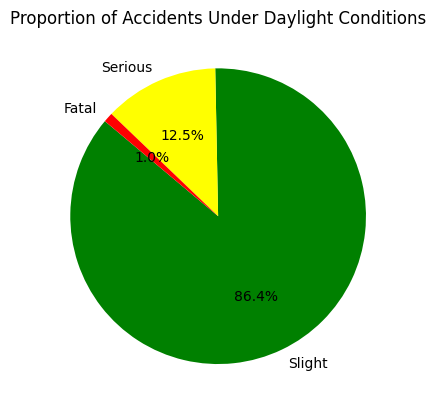

In [80]:
sl_daylight_count = sl_daylight.shape[0]
sr_daylight_count = sr_daylight.shape[0]
fa_daylight_count = fa_daylight.shape[0]

labels = ['Slight', 'Serious', 'Fatal']
sizes = [sl_daylight_count, sr_daylight_count, fa_daylight_count]
colors = ['green', 'yellow', 'red']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Proportion of Accidents Under Daylight Conditions")
plt.show()

<h1>DATA AGGREGATION</h1>
<h3>.groupby()</h3>

<h3>INSIGHT No. 6</h3>
<h4>Year with a highest number fatalities in Rural Area</h4>

<h5>Answer: Year 2019 has a record of the highest fatality in Rural Area.</h5>

In [40]:
accident_agg = accident.groupby(['Accident_Severity', 'Urban_or_Rural_Area', 'Year']).size()

In [41]:
accident_agg.unstack()

Year                                    2019   2020   2021   2022
Accident_Severity Urban_or_Rural_Area                            
Fatal             Rural                 1773   1495   1323   1010
                  Unallocated              0      0      0      0
                  Urban                  941    846    734    539
Serious           Rural                10310   9774   9521   7707
                  Unallocated              0      1      0      0
                  Urban                14012  13346  12476  11070
Slight            Rural                55475  50722  48172  41708
                  Unallocated              5      5      0      0
                  Urban                99599  94402  91328  82385

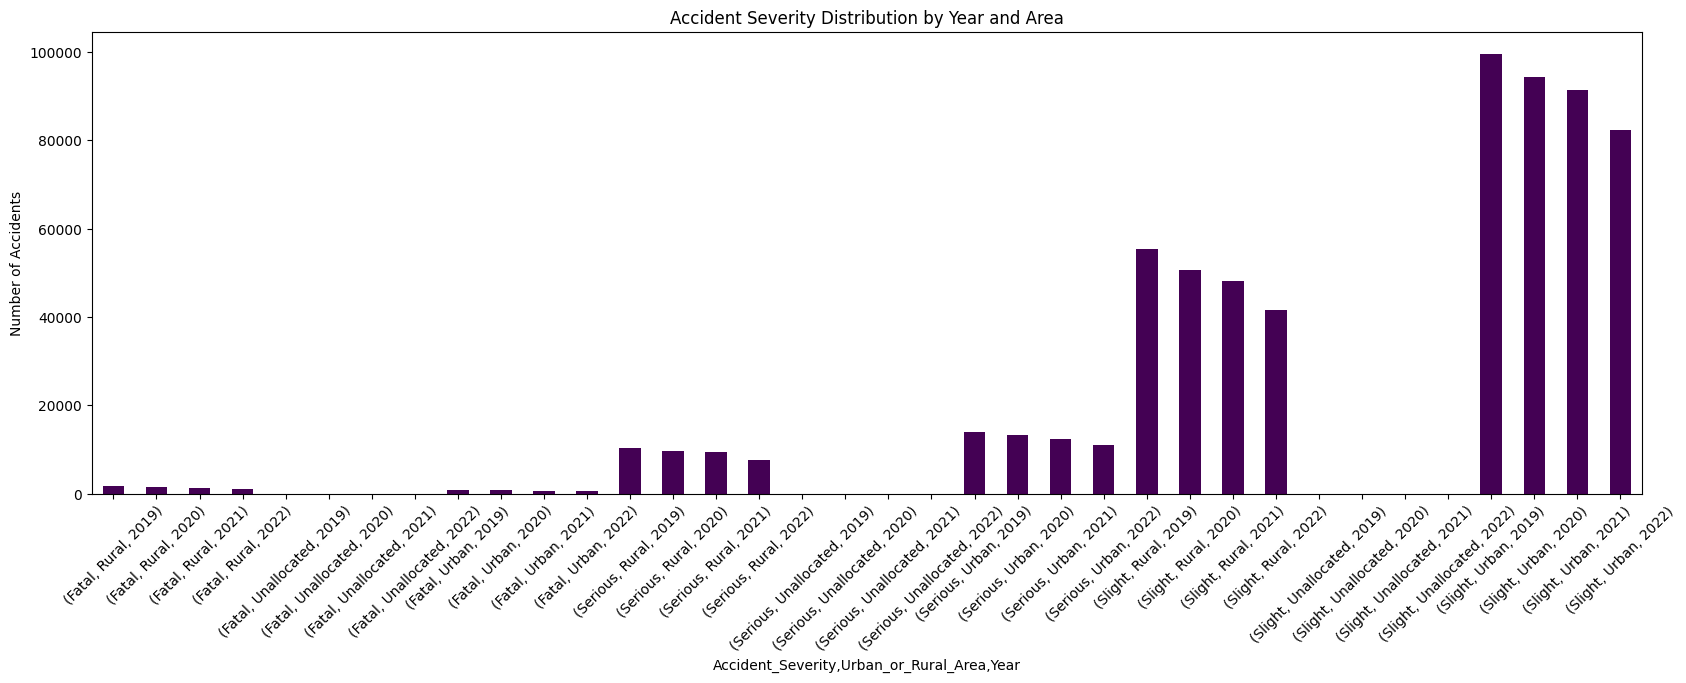

In [42]:
accident_agg.T.plot(kind='bar', figsize=(20, 6), colormap='viridis')
plt.ylabel("Number of Accidents")
plt.title("Accident Severity Distribution by Year and Area")
plt.xticks(rotation=45)
plt.show()

<h3>INSIGHT No. 7</h3>
<h4>Day of Week in February 2019 with the least count of accidents in Urban Area</h4>

<h5>Answer: Monday with 860 number of accidents</h5>

<h3>INSIGHT No. 8</h3>
<h4>Day of Week in February 2019 with the highest count of accidents in Rural Area</h4>

<h5>Answer: Thursday with 1,059 number of accidents</h5>

In [134]:
df_2019 = accident[accident['Year'] == 2019]
feb_2019 = df_2019[df_2019['Month'] == 1]

day_acc

Urban_or_Rural_Area,Rural,Unallocated,Urban
DayofWeek,,,
0,567,0,860
1,905,0,1582
2,945,0,1501
3,1059,1,1754
4,898,0,1325
5,795,0,1401
6,638,0,1124


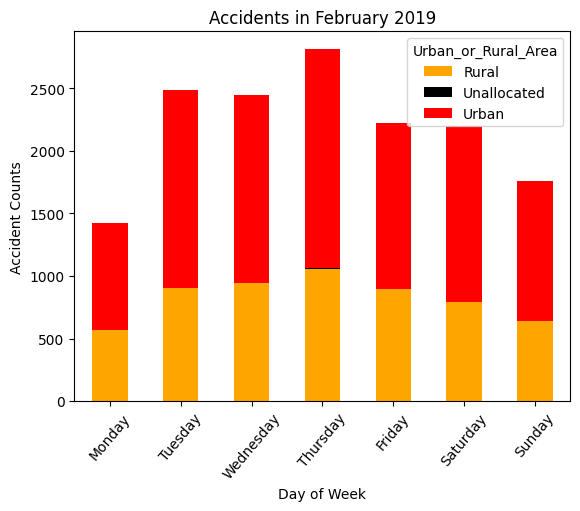

In [147]:
day_acc = feb_2019.groupby(['DayofWeek','Urban_or_Rural_Area']).size().unstack()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

day_acc.index = day_acc.index.map(day_names)
day_acc.plot(kind='bar', stacked=True, color=['orange','black', 'red'])
plt.title("Accidents in February 2019")
plt.xlabel("Day of Week")
plt.ylabel("Accident Counts")
plt.xticks(rotation=50)
plt.show()

<h3>INSIGHT No. 9</h3>
<h4>District Area with the most number of serious accident</h4>

<h5>Answer: Birmingham has the most number with 1.67% of the total of serious accident</h5>

<h3>INSIGHT No. 10</h3>
<h4>District Area with the least number of serious accident</h4>

<h5>Answer: London Airport (Heathrow) has the least number with 9 out of 88,217</h5>

In [70]:
sr_acc = accident[accident['Accident_Severity'] == 'Serious']
sr_d_area = sr_acc.groupby('District Area').size()
sr_d_area.sort_values(ascending=False)

District Area
Birmingham                   1474
Leeds                        1147
Westminster                   926
Bradford                      802
Sheffield                     749
                             ... 
Oswestry                       23
Orkney Islands                 19
Clackmannanshire               18
Shetland Islands               15
London Airport (Heathrow)       9
Length: 422, dtype: int64

In [71]:
sr_acc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88217 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    88217 non-null  category      
 1   Accident_Severity        88217 non-null  category      
 2   Accident_Date            88217 non-null  datetime64[ns]
 3   Latitude                 88217 non-null  category      
 4   Light_Conditions         88217 non-null  category      
 5   District Area            88217 non-null  category      
 6   Longitude                88217 non-null  category      
 7   Number_of_Casualties     88217 non-null  int64         
 8   Number_of_Vehicles       88217 non-null  int64         
 9   Road_Surface_Conditions  88217 non-null  category      
 10  Road_Type                88217 non-null  category      
 11  Urban_or_Rural_Area      88217 non-null  category      
 12  Weather_Conditions       88217 non-n

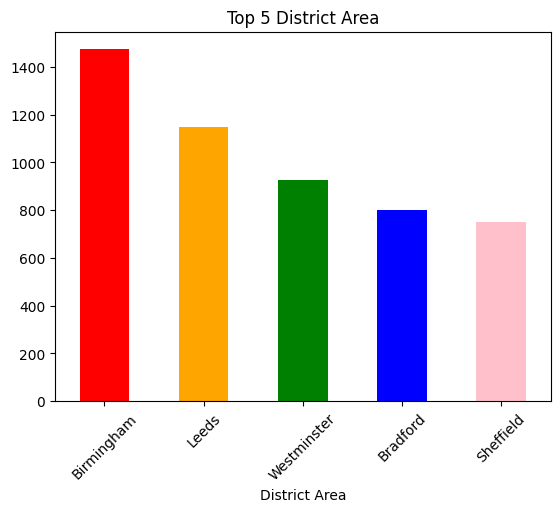

In [78]:
sr_d_area.sort_values(ascending=False).head(5).plot(kind='bar', color=['red', 'orange', 'green', 'blue', 'pink'])
plt.title("Top 5 District Area")
plt.xticks(rotation=45)
plt.show()

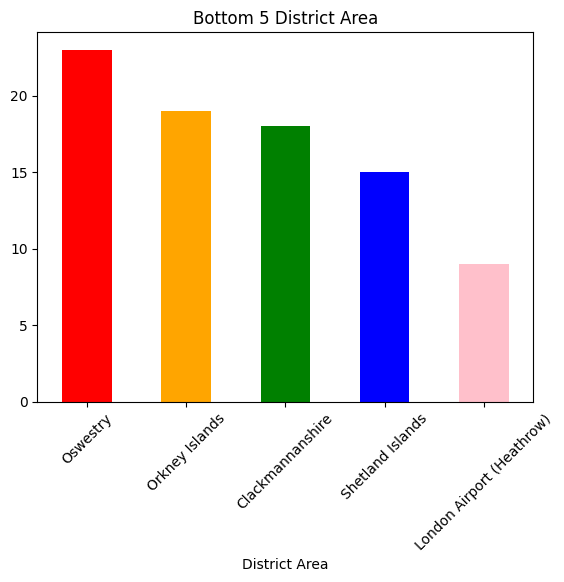

In [82]:
sr_d_area.sort_values(ascending=False).tail(5).plot(kind='bar', color=['red', 'orange', 'green', 'blue', 'pink'])
plt.title("Bottom 5 District Area")
plt.xticks(rotation=45)
plt.show()

<h1>INSIGHT no. 11</h1>
<h4>Light Condition accidents in 2020</h4>

<h5>Answer: 73.01% of the total accidents in year 2020 happened during the daylight</h5>

In [49]:
df_2020 = accident[accident['Year'] == 2020]
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170591 entries, 182115 to 352705
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    170591 non-null  category      
 1   Accident_Severity        170591 non-null  category      
 2   Accident_Date            170591 non-null  datetime64[ns]
 3   Latitude                 170591 non-null  category      
 4   Light_Conditions         170591 non-null  category      
 5   District Area            170591 non-null  category      
 6   Longitude                170591 non-null  category      
 7   Number_of_Casualties     170591 non-null  int64         
 8   Number_of_Vehicles       170591 non-null  int64         
 9   Road_Surface_Conditions  170591 non-null  category      
 10  Road_Type                170591 non-null  category      
 11  Urban_or_Rural_Area      170591 non-null  category      
 12  Weather_Conditio

In [143]:
lightcon_2020 = df_2020['Light_Conditions'].value_counts()
lightcon_2020

Light_Conditions
Daylight                       124552
Darkness - lights lit           33473
Darkness - no lighting          10067
Darkness - lighting unknown      1792
Darkness - lights unlit           707
Name: count, dtype: int64

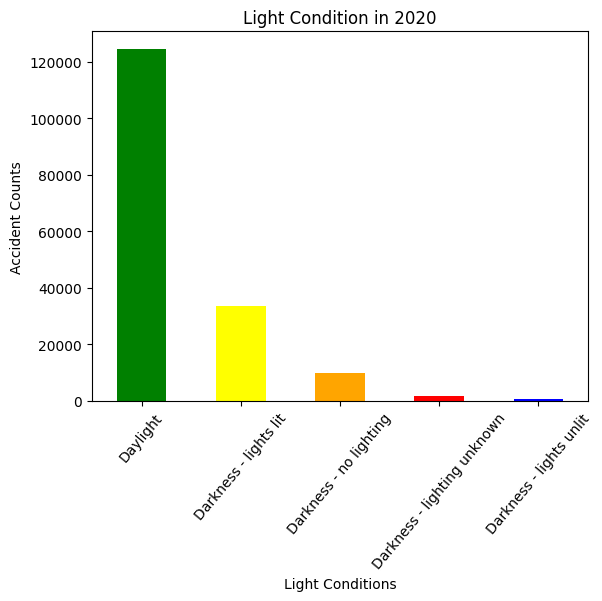

In [151]:
lightcon_2020.plot(kind='bar', color=['green', 'yellow', 'orange', 'red', 'blue'])

plt.title("Light Condition in 2020")
plt.xlabel("Light Conditions")
plt.ylabel("Accident Counts")
plt.xticks(rotation=50)
plt.show()

<h1>INSIGHT no. 12</h1>
<h4>District Area with the most number of accident in 2020</h4>

<h5>Answer: Birmingham has the highest number of accident having 2.05% of the total record of accidents in 2020</h5>

In [155]:
dis_acc = df_2020.groupby('District Area').size()
dis_acc.sort_values(ascending=False)

District Area
Birmingham                   3506
Leeds                        2333
Manchester                   1756
Glasgow City                 1651
Bradford                     1570
                             ... 
Cheshire East                   0
Northumberland                  0
Central Bedfordshire            0
Cheshire West and Chester       0
Cornwall                        0
Length: 422, dtype: int64

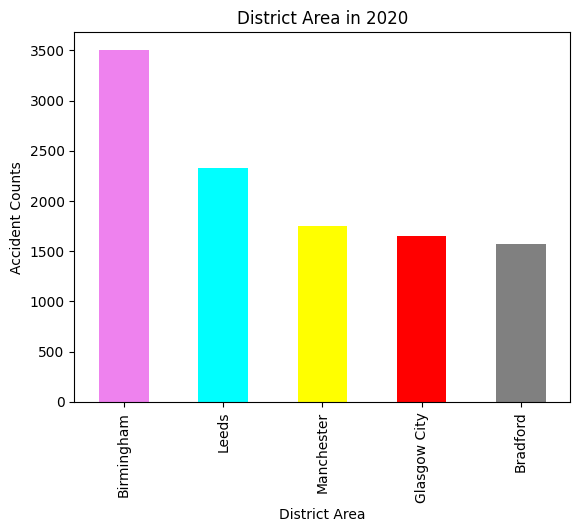

In [161]:
dis_acc.sort_values(ascending=False).head(5).plot(kind = 'bar', color=['violet', 'cyan', 'yellow', 'red', 'gray'])
plt.title("District Area in 2020")
plt.xlabel("District Area")
plt.ylabel("Accident Counts")
plt.show()

<h1>INSIGHT no. 13</h1>
<h4>Type of vehicle with a highest number of casualties with Fine no high winds weather condition in Rural Area</h4>

<h5>Answer: The Car has highest number of casualties having a weather condition of fine no high winds with 20.7% in Rural Area of the total accident that happened in the year 2020</h5>

<h1>INSIGHT no. 14</h1>
<h4>Type of vehicle with a highest number of casualties with Fine no high winds weather condition in Urban Area</h4>

<h5>Answer: The Car has highest number of casualties having a weather condition of fine no high winds with 37.6% in Urban of the total accident that happened in the year 2020</h5>

In [186]:
df_weather = df_2020[df_2020['Weather_Conditions'] == 'Fine no high winds']
df_vehicle_weather = df_weather.groupby(['Vehicle_Type', 'Urban_or_Rural_Area'])['Number_of_Casualties'].size()
df_vehicle_weather.unstack()

Urban_or_Rural_Area,Rural,Unallocated,Urban
Vehicle_Type,,,
Agricultural vehicle,117,0,327
Bus or coach (17 or more pass seats),1855,0,3342
Car,35318,3,64165
Data missing or out of range,0,0,4
Goods 7.5 tonnes mgw and over,1043,0,2479
Goods over 3.5t. and under 7.5t,384,0,802
Minibus (8 - 16 passenger seats),147,0,270
Motorcycle 125cc and under,1023,0,2142
Motorcycle 50cc and under,441,0,932


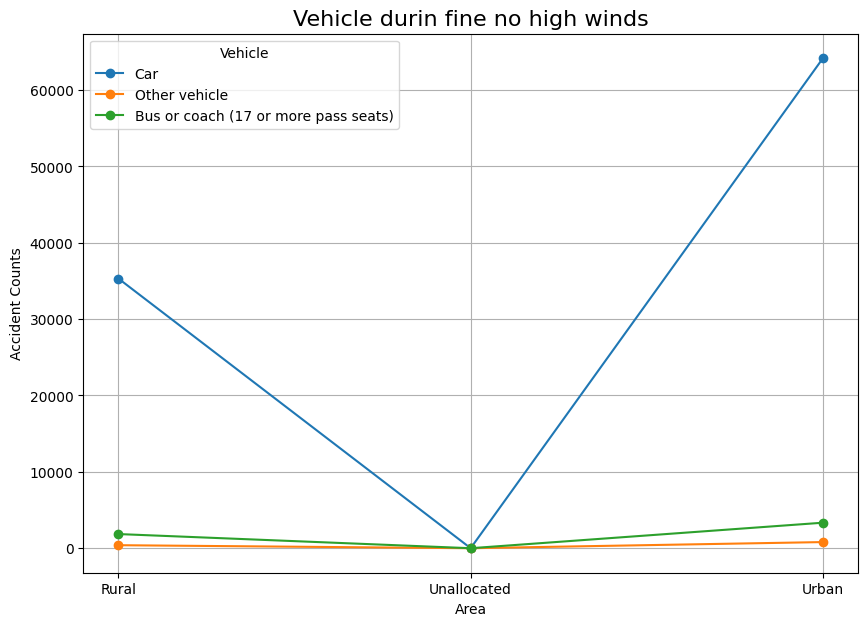

In [192]:
df_vehicle_weather = df_weather.groupby(['Vehicle_Type', 'Urban_or_Rural_Area']).size().reset_index(name = 'Accident_Count')

vehicle_weather_piv = df_vehicle_weather.pivot(index = 'Urban_or_Rural_Area', columns = 'Vehicle_Type', values = 'Accident_Count')



plt.plot(vehicle_weather_piv.index, vehicle_weather_piv['Car'], label = 'Car', marker = 'o')
plt.plot(vehicle_weather_piv.index, vehicle_weather_piv['Other vehicle'], label = 'Other vehicle', marker = 'o')
plt.plot(vehicle_weather_piv.index, vehicle_weather_piv['Bus or coach (17 or more pass seats)'], label = 'Bus or coach (17 or more pass seats)', marker = 'o')

plt.title('Vehicle durin fine no high winds', fontsize=16)
plt.xlabel('Area')
plt.ylabel('Accident Counts')
plt.legend(title = 'Vehicle')
plt.gcf().set_size_inches(10,7)
plt.grid()

<h1>INSIGHT no. 15</h1>
<h4>Month with the most number of accident cases in 2021</h4>

<h5>Answer: Month of November in the year 2021 has the most accident cases with total of 15,473 number of accidents</h5>

In [53]:
df_2021 = accident[accident['Year'] == 2021]

In [54]:
month_df = df_2021['Month'].value_counts()
month_df

Month
11    15473
10    14834
7     14300
6     13936
5     13811
9     13792
12    13709
1     13417
8     13415
3     13202
4     12715
2     10950
Name: count, dtype: int64

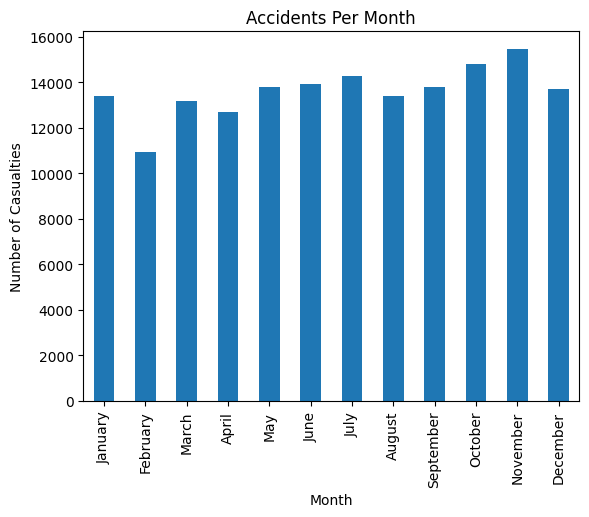

In [55]:
accident_per_month = df_2021['Month'].value_counts().sort_index()

#Dictionary name = {key: 'value', key: 'value'}
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October',  11: 'November', 12: 'December'
}

accident_per_month.index = accident_per_month.index.map(month_names)

accident_per_month.plot(kind='bar')
plt.title('Accidents Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Casualties')
plt.show()

<h1>INSIGHT no. 16</h1>
<h4>Fatal cases in November 2021</h4>

<h5>Answer: There are 169 cases of Fatal accidents in November 2021</h5>

<h1>INSIGHT no. 17</h1>
<h4>Serious cases in November 2021</h4>

<h5>Answer: There are 1,992 cases of Serious accidents in November 2021</h5>

<h1>INSIGHT no. 18</h1>
<h4>Slight injuries in November 2021</h4>

<h5>Answer: There are 12,673 cases of Slight accidents in November 2021</h5>

In [163]:
nov_2021 = df_2021[df_2021['Month'] == 10]

In [212]:
sev_nov_2021 = nov_2021['Accident_Severity']
sev_nov_2021.value_counts()

Accident_Severity
Slight     12673
Serious     1992
Fatal        169
Name: count, dtype: int64

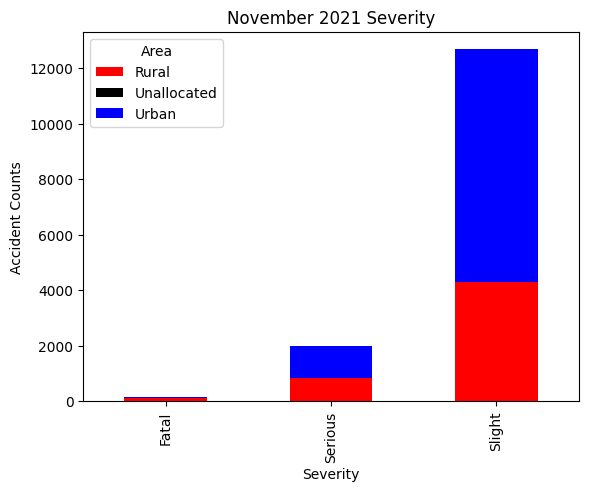

In [219]:
severity_november = nov_2021.groupby(['Accident_Severity', 'Urban_or_Rural_Area']).size().unstack()

severity_november.plot(kind='bar', stacked=True, color=['red','black', 'blue'])
plt.title("November 2021 Severity")
plt.xlabel("Severity")
plt.ylabel("Accident Counts")
plt.legend(title="Area")
plt.show()


<h1>INSIGHT no. 19</h1>
<h4>Road Type and Surface Condition in November 2021</h4>

<h5>Answer: Single carriageway in Dry Surface Condition has the most number of casualties in November 2021</h5>

In [187]:
nov_road = nov_2021.groupby(['Road_Type', 'Road_Surface_Conditions'])['Number_of_Casualties'].size()

In [188]:
nov_road.unstack()

Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp,unknown road condition
Road_Type,,,,,,
Dual carriageway,1533,0,0,0,631,2
One way street,205,0,0,0,75,1
Roundabout,746,0,1,0,298,1
Single carriageway,7695,15,4,2,3403,9
Slip road,110,0,0,1,41,0
unaccounted,48,0,0,0,13,0


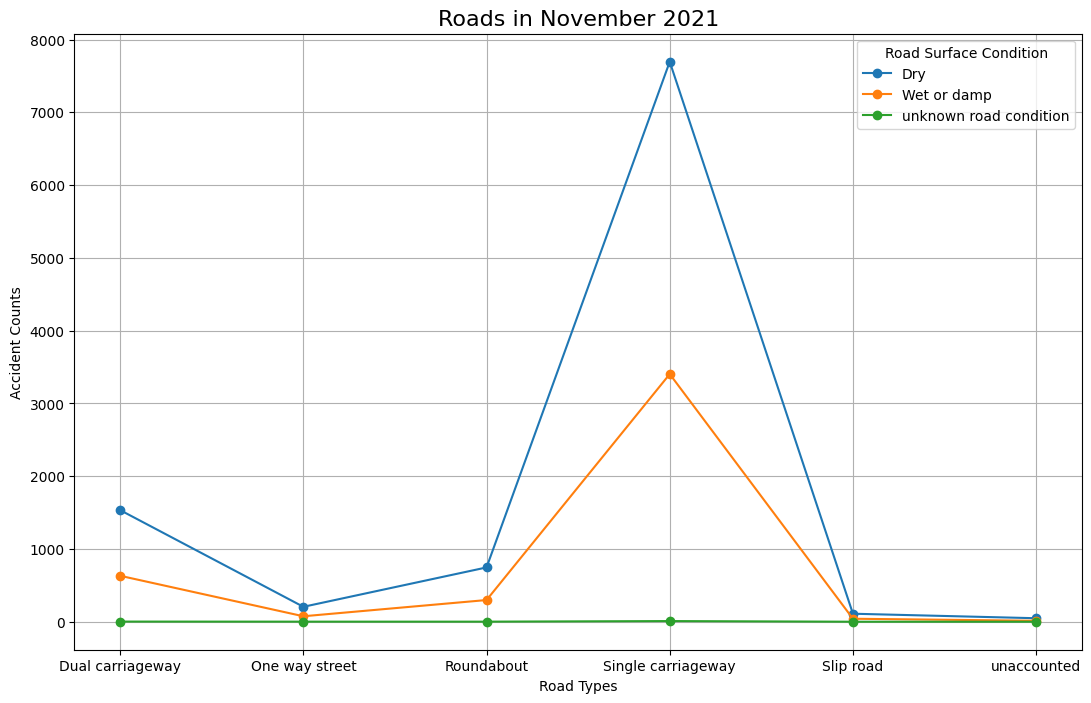

In [223]:
nov_road = nov_2021.groupby(['Road_Type', 'Road_Surface_Conditions']).size().reset_index(name = 'Accident_Count')

nov_road_piv = nov_road.pivot(index = 'Road_Type', columns = 'Road_Surface_Conditions', values = 'Accident_Count')

plt.plot(nov_road_piv.index, nov_road_piv['Dry'], label = 'Dry', marker = 'o')
plt.plot(nov_road_piv.index, nov_road_piv['Wet or damp'], label = 'Wet or damp', marker = 'o')
plt.plot(nov_road_piv.index, nov_road_piv['unknown road condition'], label = 'unknown road condition', marker = 'o')

plt.title('Roads in November 2021', fontsize=16)
plt.xlabel('Road Types')
plt.ylabel('Accident Counts')
plt.legend(title = 'Road Surface Condition')
plt.gcf().set_size_inches(13,8)
plt.grid()

<h1>INSIGHT no. 20</h1>
<h4>Number of Casualties and Vehicle Type in November 2021</h4>

<h5>Answer: Car has the most number of casualties with 135 Fatalities, 1,538 Serious cases, and 9,953 Slight Injuries, which means
75.13% of the total accidents happened in November 2021 came from Car accidents</h5>

In [220]:
casualties_nov = nov_2021.groupby(['Vehicle_Type', 'Accident_Severity'])['Number_of_Casualties'].size()

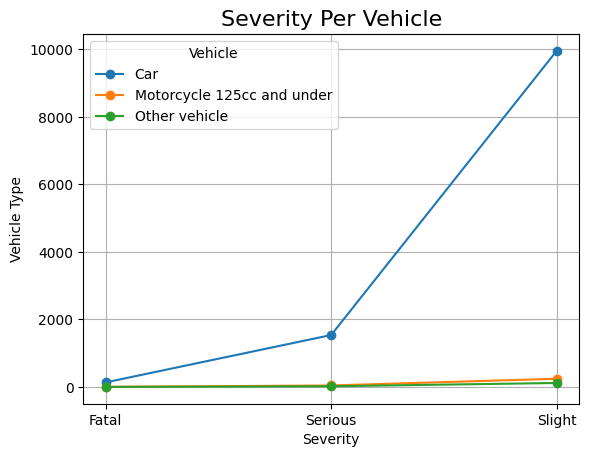

In [221]:
casualties_nov = nov_2021.groupby(['Vehicle_Type', 'Accident_Severity']).size().reset_index(name = 'Accident_Count')
casualties_nov

pivot_data = casualties_nov.pivot(index = 'Accident_Severity', columns = 'Vehicle_Type', values = 'Accident_Count')
pivot_data

plt.plot(pivot_data.index, pivot_data['Car'], label = 'Car', marker = 'o')
plt.plot(pivot_data.index, pivot_data['Motorcycle 125cc and under'], label = 'Motorcycle 125cc and under', marker = 'o')
plt.plot(pivot_data.index, pivot_data['Other vehicle'], label = 'Other vehicle', marker = 'o')

plt.title('Severity Per Vehicle', fontsize=16)
plt.xlabel('Severity')
plt.ylabel('Vehicle Type')
plt.legend(title = 'Vehicle')
plt.grid()

In [67]:
casualties_nov.unstack

<bound method DataFrame.unstack of                              Vehicle_Type Accident_Severity  Accident_Count
0                    Agricultural vehicle             Fatal               0
1                    Agricultural vehicle           Serious               8
2                    Agricultural vehicle            Slight              36
3    Bus or coach (17 or more pass seats)             Fatal               4
4    Bus or coach (17 or more pass seats)           Serious              48
5    Bus or coach (17 or more pass seats)            Slight             305
6                                     Car             Fatal             135
7                                     Car           Serious            1538
8                                     Car            Slight            9953
9            Data missing or out of range             Fatal               0
10           Data missing or out of range           Serious               0
11           Data missing or out of range            

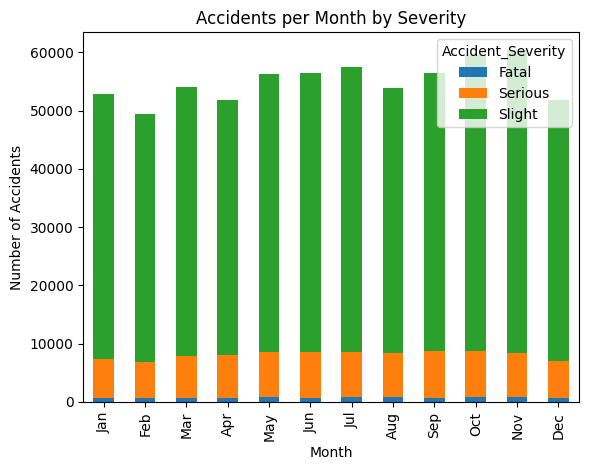

In [128]:
accidents_per_month_severity = accident.groupby(['Month', 'Accident_Severity']).size().unstack()

month_names = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}

accidents_per_month_severity.index = accidents_per_month_severity.index.map(month_names)

accidents_per_month_severity.plot(kind='bar', stacked=True)
plt.title('Accidents per Month by Severity')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

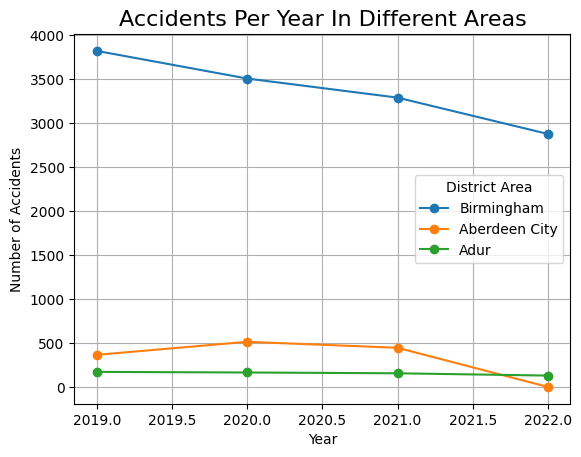

In [69]:
accidents_per_area = accident.groupby(['Year', 'District Area']).size().reset_index(name = 'Accident_Count')
accidents_per_area

#Pivot the data to have one column per District Area
pivot_data = accidents_per_area.pivot(index = 'Year', columns = 'District Area', values = 'Accident_Count')
pivot_data

plt.plot(pivot_data.index, pivot_data['Birmingham'], label = 'Birmingham', marker = 'o')
plt.plot(pivot_data.index, pivot_data['Aberdeen City'], label = 'Aberdeen City', marker = 'o')
plt.plot(pivot_data.index, pivot_data['Adur'], label = 'Adur', marker = 'o')

plt.title('Accidents Per Year In Different Areas', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title = 'District Area')
plt.grid()